<a href="https://colab.research.google.com/github/Nasser1159/Computer-Vision/blob/main/Generalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PHASE 1 💻**

## **Mohamed Abdelnasser 20P9501 , (01202554639)**
## **Malak Mohamed Mahfouz 20P7813 , (01288101288)**
## **Team 22**

## **Repository Link**
## **[https://github.com/Nasser1159/Computer-Vision](https://github.com/Nasser1159/Computer-Vision)**



## **Drive Link**
## **[https://drive.google.com/drive/folders/1Du-mn-AelEk37cIoYbxeyToN5ohAbLuM?usp=sharing](https://drive.google.com/drive/folders/1Du-mn-AelEk37cIoYbxeyToN5ohAbLuM?usp=sharing)**

# **References**
###### *Main reference:* &nbsp;&nbsp; https://en.wikipedia.org/wiki/QR_code
###### *Useful illustration video:* &nbsp;&nbsp; https://youtu.be/KA8hDldvfv0
###### *Contour Detection:* &nbsp;&nbsp; https://youtu.be/WEzfqCTeI5E?si=9Oz2Ej8c-XN6JzZI
###### *Geometric Transformation:* &nbsp;&nbsp; https://youtu.be/WEzfqCTeI5E?si=9Oz2Ej8c-XN6JzZI
###### *Ahmed Salama:* &nbsp;&nbsp; https://colab.research.google.com/drive/1SdsQ3z0nLogu75hqry1dQJ33z7ykEkUV?usp=sharing

<br/>

## **Imports**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## **Generalization**

## **Function to check histogram**

In [ ]:
def check_H(img):

  percentage = []

  hist = cv2.calcHist([img], [0], None, [256], [0,256])
  light_threshold = 205
  darker_threshold = 20

  light_pixels = np.sum(hist[light_threshold+1:])
  dark_pixels = np.sum(hist[:darker_threshold])

  total_pixels = img.size
  Light_percentage = light_pixels / total_pixels * 100

  Dark_percentage = dark_pixels / total_pixels * 100

  percentage = [Light_percentage,Dark_percentage]

  return percentage

## **Rotate Image**

In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

## **Perspective**

In [ ]:
def Perspective(img):
  width , height = 1012,1012
  pts1 = np.float32([[313,195],[980,88],[55,955],[725,855]])
  pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
  matrix = cv2.getPerspectiveTransform(pts1,pts2)
  img = cv2.warpPerspective(img,matrix,(width,height))

  img = cv2.copyMakeBorder(img , 20 , 20 ,20 , 20 , cv2.BORDER_CONSTANT,value=[255,255,255])

  return img

## **Sharpening Filter**

In [ ]:
def sharpen_image(image):
  kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  return cv2.filter2D(image,-1,kernel)

## **Check Contours**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_locator_boxes(img):


    # Threshold the image
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Potential locator boxes will be among the largest contours but not the largest (which is likely the whole QR)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:10]  # Exclude the largest contour

    # Filter out the contours that do not resemble a square
    locator_boxes = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approximation = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        # Check if the contour is roughly rectangular
        if len(approximation) == 4:
            (x, y, w, h) = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)

            # Check if square-like and has significant size
            if 0.8 < aspect_ratio < 1.2 and cv2.contourArea(contour) > 100:  # threshold for area might need adjustment
                locator_boxes.append(contour)

    # Assuming the locator patterns are among the three largest square-like contours
    locator_boxes = sorted(locator_boxes, key=cv2.contourArea, reverse=True)[:3]

    arr = []
    # Draw these contours on the image and print centers
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for box in locator_boxes:
        cv2.drawContours(output_img, [box], -1, (0, 255, 0), 3)
        M = cv2.moments(box)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            arr.append([cx,cy])
            cv2.circle(output_img, (cx, cy), 5, (0, 0, 255), -1)

    if((len(arr) < 3) or (arr[0] == arr[1]) or (arr[0] == arr[2]) or (arr[1] == arr[2])):
      return "false"

    if(arr[2][1] == arr[1][1]):
      if(arr[2][0] != arr[0][0]):
        return "Flipped"
    if(arr[2][0] == arr[0][0]):
        if(arr[0][1] != arr[2][1]):
          if(arr[1][1] == arr[2][1]):
            return "Correct"
          else:
            return "Rotated 180"
    elif(((arr[0][1] - arr[2][1])/(arr[0][0] - arr[2][0])) < 0):
        return "prespective"

    return "damaged"

"""
top left locator box has the same cy with the top right locator box and
the top left locator box has the same cx with the bottom left locator box
"""

'\ntop left locator box has the same cy with the top right locator box and \nthe top left locator box has the same cx with the bottom left locator box\n'

## **Function 2 to check Histogram**

In [ ]:
def check_HH(img):

  percentage = []

  hist = cv2.calcHist([img], [0], None, [256], [0,256])
  light_threshold = 200
  darker_threshold = 128

  light_pixels = np.sum(hist[light_threshold+1:])
  dark_pixels = np.sum(hist[:darker_threshold])

  total_pixels = img.size
  Light_percentage = light_pixels / total_pixels * 100

  Dark_percentage = dark_pixels / total_pixels * 100

  percentage = [Light_percentage,Dark_percentage]

  return percentage

## **Generic but too specific**
## **Solve all test cases except 2 , 9 , 11 and 12**

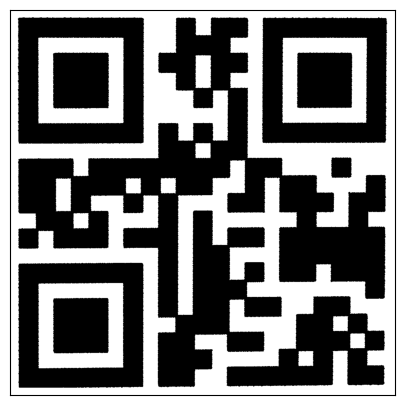

In [ ]:
img = cv2.imread("/content/06-Railfence-cipher.png",cv2.IMREAD_GRAYSCALE)

if(find_locator_boxes(img) == "Flipped"):
    img = cv2.flip(img, 1)
elif(find_locator_boxes(img) == "Rotated 180"):
  img = cv2.rotate(img, cv2.ROTATE_180)

if(check_H(img)[0] > 90):
  img = rotate_image(img,-21)
  img = img[577:725 , 532:688]
  img = cv2.resize(img,(1012,1012))

elif(check_H(img)[0] > 70):
  img = Perspective(img)

if (check_H(img)[1] > 56 and check_H(img)[1] < 60):
  img = 255 - img
  _, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Generic 100%**
## **It solves all test cases except 2 , 11 , 13 , 14**

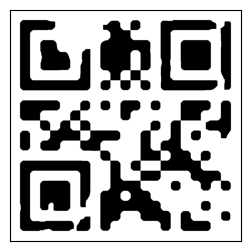

In [ ]:
img = cv2.imread("/content/08-Compresso-Espresso.png", cv2.IMREAD_GRAYSCALE)

if(find_locator_boxes(img) == "Flipped"):
    img = cv2.flip(img, 1)
elif(find_locator_boxes(img) == "Rotated 180"):
  img = cv2.rotate(img, cv2.ROTATE_180)
elif(find_locator_boxes(img) == "prespective"):
  img = Perspective(img)

if(check_HH(img)[1] > 50):
  img = 255 - img
  _, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img = cv2.medianBlur(img,27)
img = cv2.dilate(img,square_se)
img = cv2.erode(img,square_se)

img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 115, 255, cv2.THRESH_BINARY)
img = sharpen_image(img)


fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Straighten into a square**

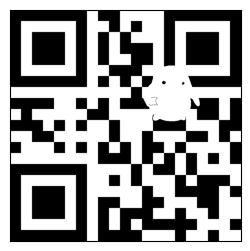

In [ ]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

img_no_quiet_zone = img[start_row:end_row, start_col:end_col]

fig = plt.figure(figsize=(3,3 ));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_no_quiet_zone, cmap='gray');

## **Test Cases**

## **Test Case 1**

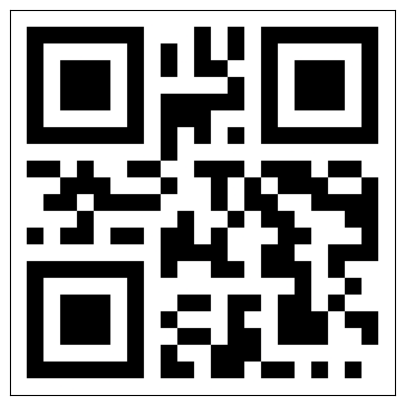

In [ ]:
img = cv2.imread("/content/01-Getting-started.png")

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 2**

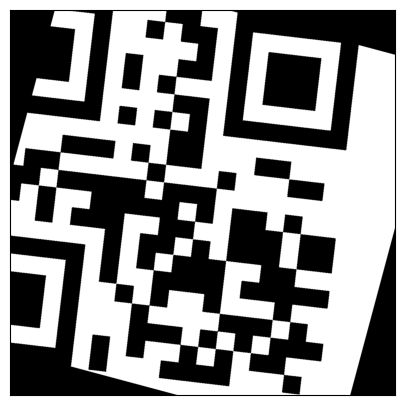

In [ ]:
img = cv2.imread("/content/02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img,345)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 3**

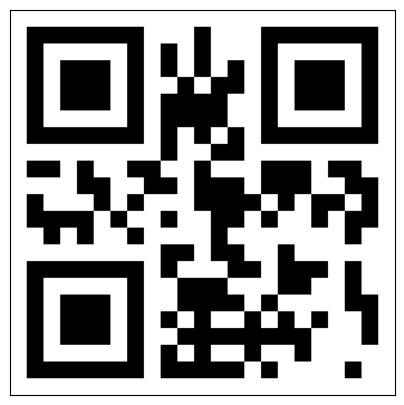

In [ ]:
img = cv2.imread("/content/03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 4**

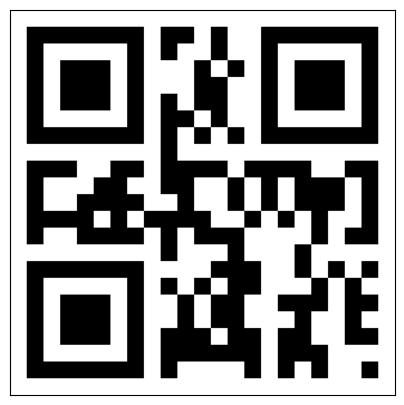

In [ ]:
img = cv2.imread("/content/04-Black-mirror.png",cv2.IMREAD_GRAYSCALE)
img = 255 - img
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
img = cv2.flip(img, 1)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 5**

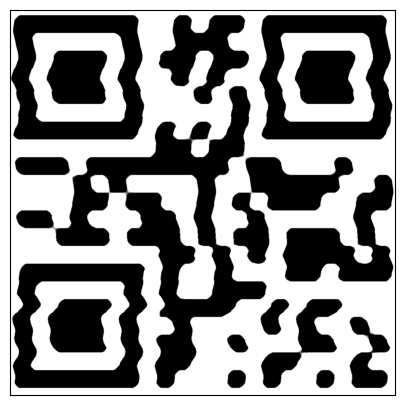

In [ ]:
img = cv2.imread("/content/05-Caesar-cipher.png")

img = cv2.medianBlur(img,27)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 6**

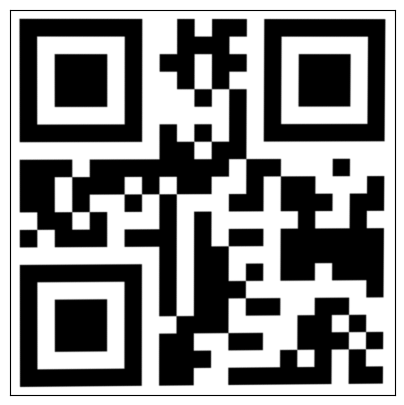

In [ ]:
img = cv2.imread("/content/06-Railfence-cipher.png", cv2.IMREAD_GRAYSCALE)

img = Perspective(img)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 7**

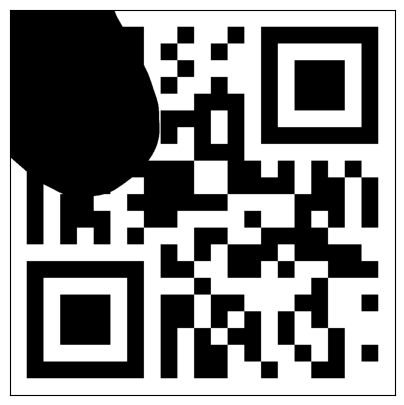

In [ ]:
img = cv2.imread("/content/07-THE-MIGHTY-FINGER.png",cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 8**

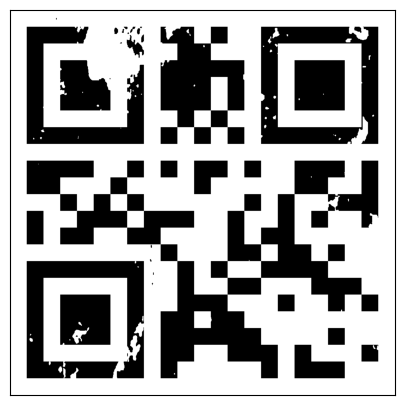

In [ ]:
img = cv2.imread("/content/08-Compresso-Espresso.png",cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 173, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 9**

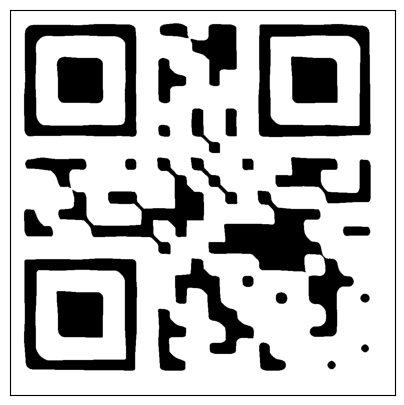

In [ ]:
img = cv2.imread('/content/09-My-phone-fell-while-taking-this-one-...-or-did-it.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img = sharpen_image(img)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 10**

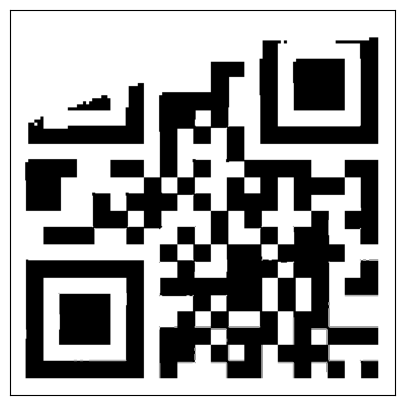

In [ ]:
img = cv2.imread("/content/10-Gone-With-The-Wind.png",cv2.IMREAD_GRAYSCALE)

img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 11**

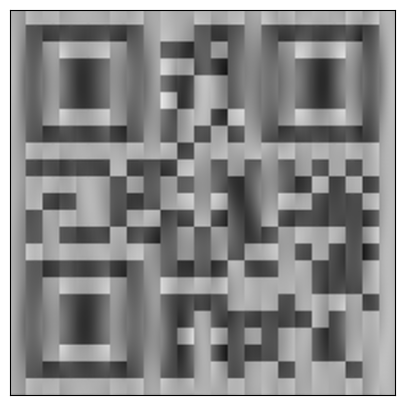

In [ ]:
img = cv2.imread("/content/11-weewooweewooweewoo.png",0)

fourier_transform = np.fft.fft2(img)
center_shift = np.fft.fftshift(fourier_transform)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# horizontal mask
center_shift[crow - 4:crow + 4, 0:ccol - 10] = 1
center_shift[crow - 4:crow + 4, ccol + 10:] = 1

f_shift = np.fft.ifftshift(center_shift)
denoised_image = np.fft.ifft2(f_shift)
denoised_image = np.real(denoised_image)


denoised_image = cv2.convertScaleAbs(denoised_image)
denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY2BGR)


fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(denoised_image, cmap='gray');

## **Test Case 12**

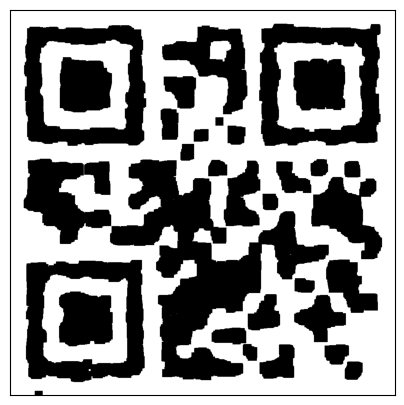

In [ ]:
img = cv2.imread('/content/12-mal7-w-felfel.png', cv2.IMREAD_GRAYSCALE)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img = cv2.medianBlur(img,27)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.dilate(img,square_se)
img = cv2.erode(img,square_se)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 13**

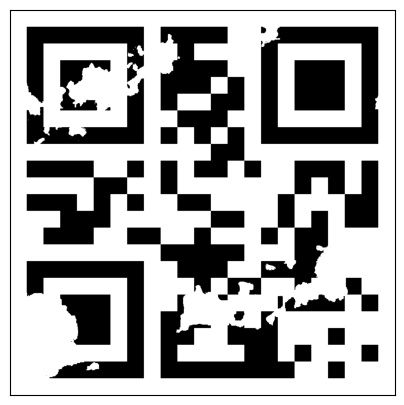

In [ ]:
img = cv2.imread("/content/13-2el-noor-2ata3.png", cv2.IMREAD_GRAYSCALE)

_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 14**

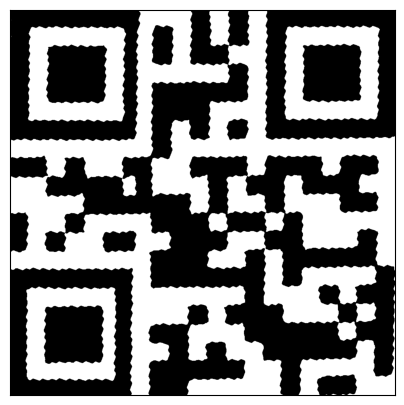

In [ ]:
img = cv2.imread("/content/14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)
"""
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img,-21)
img = img[577:725 , 532:688]
img = cv2.resize(img,(1012,1012))
"""

img = sharpen_image(img)
img = sharpen_image(img)
width , height = 1012,1012
pts1 = np.float32([[575,563],[694,518],[621,679],[738,636]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
img = cv2.warpPerspective(img,matrix,(width,height))

_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 15**

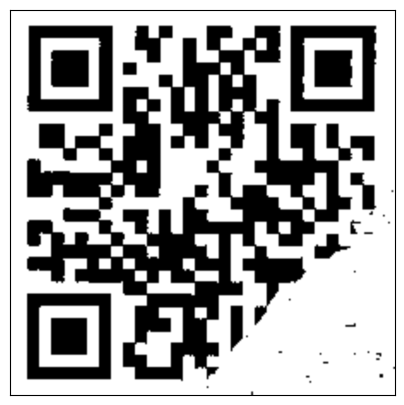

In [ ]:
img = cv2.imread("/content/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

img = img[50:270 , 55:280]
img = cv2.resize(img,(1012,1012))

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 16**

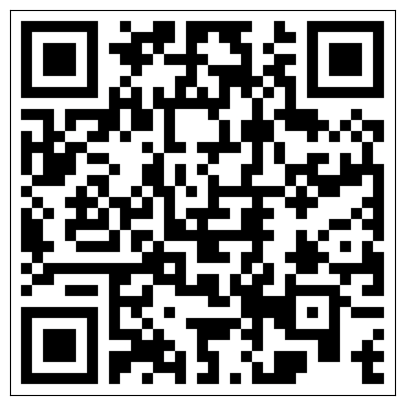

In [ ]:
img = cv2.imread("/content/16-V3-QR-Code...-can-you-do-it.png")

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Hello**

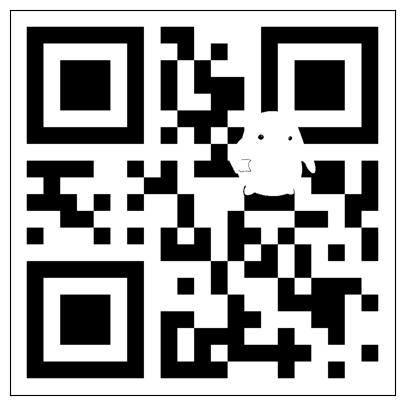

In [ ]:
img = cv2.imread("/content/QR_1_Hello.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Symbols**

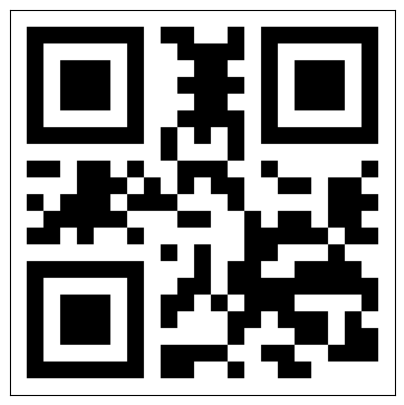

In [ ]:
img = cv2.imread("/content/QR_2_Symbols.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **A**

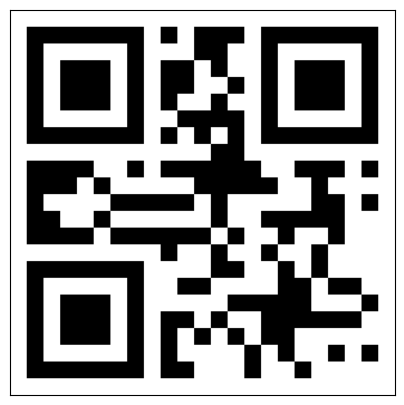

In [ ]:
img = cv2.imread("/content/QR_3_a.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');